# CIFAR10
Hier die ersten Schritte, für die Bearbeitung des CIFAR10-Datensatzes

# Laden der Train & Testdaten
Im MNIST-Beispiel habe ich die Daten zunächst im Code heruntergeladen und entpackt. In diesem CIFAR10-Beispiel Lade ich den Datensatz mit dem Keras implementierung

In [1]:
from tensorflow.python.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

c:\users\1810837475\.conda\envs\testtensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\1810837475\.conda\envs\testtensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\1810837475\.conda\envs\testtensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\1810837475\.conda\envs\testtens

In [2]:
NUM_CLASSES = 10

In [3]:
CIFAR_10_CLASSES = ["Flugz.","PKW","Vogel","Katze","Wild","Hund", "Frosch", "Pferd", "Schiff","LKW"]

In [4]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

In [5]:
print((train_X.shape))
print((train_y.shape))
print((test_X.shape))
print((test_y.shape))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [12]:
# hier noch ne Function draus für trainx und testx
def checkConsistency(test):
    for testPicture in range(0, len(test),1):
        if(train_X[testPicture].shape[0] == train_X[0].shape[0] and 
           train_X[testPicture].shape[1] == train_X[0].shape[1] and
           train_X[testPicture].shape[2] == train_X[0].shape[2]):
            continue
        else:
            print("Die Bilder haben nicht alle den gleichen Shape => es muss ein Reshaping gemacht werden") 
            
checkConsistency(train_X)  
checkConsistency(test_X)     
      

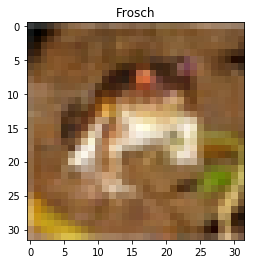

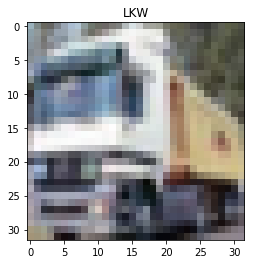

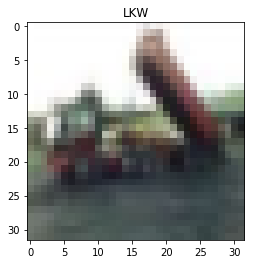

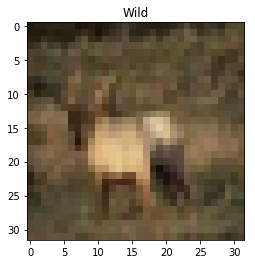

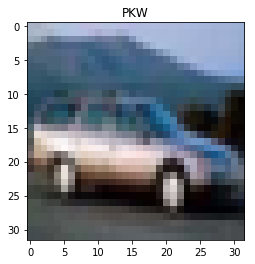

In [13]:
bspImgs= [3,9,50,5001,3490]
# das sind [Frosch,LKW,LKW,WILD,Fahrzeug] 
for i in range(len(bspImgs)):
    plt.title(CIFAR_10_CLASSES[int(train_y[i])])
    plt.imshow(train_X[i])
    plt.show()

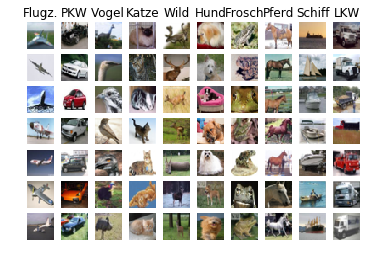

In [14]:
# Alternativ anzeigen unterschiedliche Bilder
num_classes = len(CIFAR_10_CLASSES)
samples_per_class = 7

for y, cls in enumerate(CIFAR_10_CLASSES):
    idxs = np.flatnonzero(train_y == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_X[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [15]:
# Reshaping
train_X = train_X.reshape(50000,32*32*3)
test_X = test_X.reshape(10000,32*32*3)
print((train_X.shape))
print((train_y.shape))
print((test_X.shape))
print((test_y.shape))

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [16]:
# Normalisieren
train_X = np.array(train_X, dtype="float32")
test_X = np.array(test_X, dtype="float32")
train_X /= 255
test_X /=255
train_y = to_categorical(train_y, NUM_CLASSES)
test_y = to_categorical(test_y, NUM_CLASSES)

In [17]:
# Save the preprocessed data to disk for further Work in Models
np.save('./DATA/train_X', train_X)
np.save('./DATA/train_y', train_y)
np.save('./DATA/test_X', test_X)
np.save('./DATA/test_y', test_y)


testTrainY = np.load('./DATA/train_X.npy')
print(train_X.shape)
print(testTrainY.shape)

## Status
Die Daten sind somit ausreichend vorverarbeitet, sodass eine Modellierung beginnen kann. Im Vergleich zu MNIST musste 